# Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load train and test datasets

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
train_df.shape

(891, 12)

In [5]:
test_df.shape

(418, 11)

# Highlight of heads

In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Brief description of data

In [8]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Checking null value existence

In [11]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Checking individual feature + Outlier treatment (if any) + EDA + Feature engineering

## feature : Pclass

In [12]:
# unique value counts
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [13]:
# crosstabbing
pd.crosstab(train_df['Pclass'], train_df['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Text(0, 0.5, 'Survival Rate')

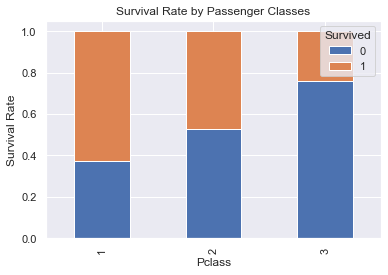

In [14]:
#significance level check
xtab_Pclass_Survived = pd.crosstab(train_df['Pclass'], train_df['Survived'])
xref_Pclass_Survived = xtab_Pclass_Survived.div(xtab_Pclass_Survived.sum(1).astype(float), axis=0)

xref_Pclass_Survived.plot(kind='bar', 
                   stacked=True, 
                   title='Survival Rate by Passenger Classes')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')

#### from above graph it can be inferred that Pclass is a significant feature on survival - from class 1 to 3 it has a descending survival rate

#### label encoding would not be required here as 1/2/3 can be treated as labels itself

## feature : Sex

In [15]:
train_df['Sex'] = train_df['Sex'].apply(lambda x: x.lower())

In [16]:
train_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [17]:
sexes = sorted(train_df['Sex'].unique())
genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))
genders_mapping

{'female': 0, 'male': 1}

In [18]:
train_df['Sex_Labels'] = train_df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

In [19]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Labels
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0


In [20]:
# crosstabbing
pd.crosstab(train_df['Sex_Labels'], train_df['Survived'])

Survived,0,1
Sex_Labels,,
0,81,233
1,468,109


In [21]:
#checking survival rate for each of male/female from each class
for passenger_class in sorted(train_df['Pclass'].unique()):
    print('M', passenger_class, len(train_df[(train_df['Sex'] == 'male') & (train_df['Pclass'] == passenger_class)]))
    print('F', passenger_class, len(train_df[(train_df['Sex'] == 'female') & (train_df['Pclass'] == passenger_class)]))

M 1 122
F 1 94
M 2 108
F 2 76
M 3 347
F 3 144


In [22]:
gb = train_df.groupby(['Pclass','Survived']).count()
gb

PassengerId  Name  Sex  Age  SibSp  Parch  Ticket  Fare  \
Pclass Survived                                                            
1      0                  80    80   80   64     80     80      80    80   
       1                 136   136  136  122    136    136     136   136   
2      0                  97    97   97   90     97     97      97    97   
       1                  87    87   87   83     87     87      87    87   
3      0                 372   372  372  270    372    372     372   372   
       1                 119   119  119   85    119    119     119   119   

                 Cabin  Embarked  Sex_Labels  
Pclass Survived                               
1      0            59        80          80  
       1           117       134         136  
2      0             3        97          97  
       1            13        87          87  
3      0             6       372         372  
       1             6       119         119

## feature : Age

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


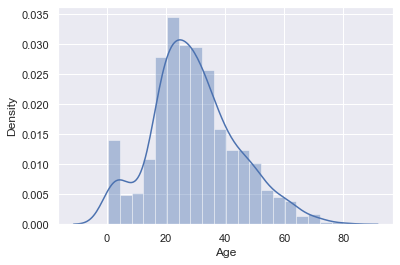

In [23]:
sns.distplot(train_df['Age'])
plt.show()

In [24]:
train_df['Age'].quantile([0.01,0.02,0.03,0.04, 0.25, 0.5, 0.9,0.95,0.96,0.97,0.98,0.99,1.0])

0.01     1.000
0.02     2.000
0.03     2.000
0.04     3.000
0.25    20.125
0.50    28.000
0.90    50.000
0.95    56.000
0.96    58.000
0.97    60.610
0.98    62.740
0.99    65.870
1.00    80.000
Name: Age, dtype: float64

In [25]:
train_df['Age'].isna().sum()

177

In [26]:
print('Age mean:', train_df['Age'].mean())
print('Age median:', train_df['Age'].median())
print('Age min:', train_df['Age'].min())
print('Age max:', train_df['Age'].max())

Age mean: 29.69911764705882
Age median: 28.0
Age min: 0.42
Age max: 80.0


In [27]:
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

In [28]:
train_df['Age'].isna().sum()

0

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


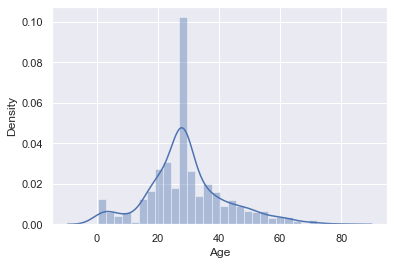

In [29]:
sns.distplot(train_df['Age'])
plt.show()

### feature : SibSp

In [30]:
train_df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


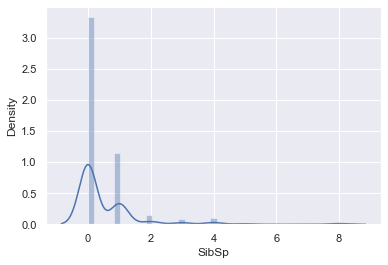

In [31]:
sns.distplot(train_df['SibSp'])
plt.show()

### feature : Parch

In [32]:
train_df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


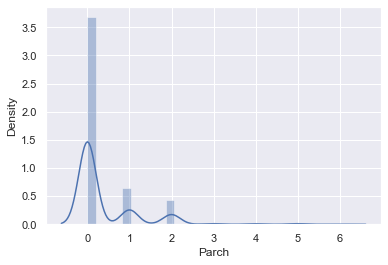

In [33]:
sns.distplot(train_df['Parch'])
plt.show()

### creating new column - Family_size

In [34]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch']
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Labels,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0


<AxesSubplot:>

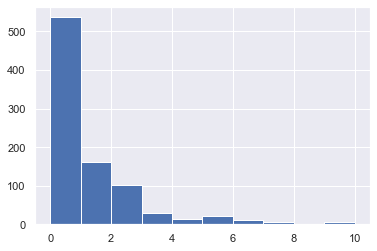

In [35]:
train_df['FamilySize'].hist()

### feature : Embarked

In [36]:
#C = Cherbourg, Q = Queenstown, S = Southampton
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [37]:
# in case Embarked value is not there, treat the passengers boarded from the 
# initial starting point - Southampton
train_df['Embarked'].fillna('S')

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [38]:
#one hot encode Embarked values
train_df = pd.get_dummies(train_df, columns=['Embarked'])

### feature : Cabin

In [39]:
train_df['Has_Cabin'] = train_df["Cabin"].apply(lambda x: 1 if type(x) == float else 0)

In [40]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_Labels,FamilySize,Embarked_C,Embarked_Q,Embarked_S,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1,1,0,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0,1,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,0,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,1,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,1,0,0,0,1,1


## Checking Correlations

<AxesSubplot:>

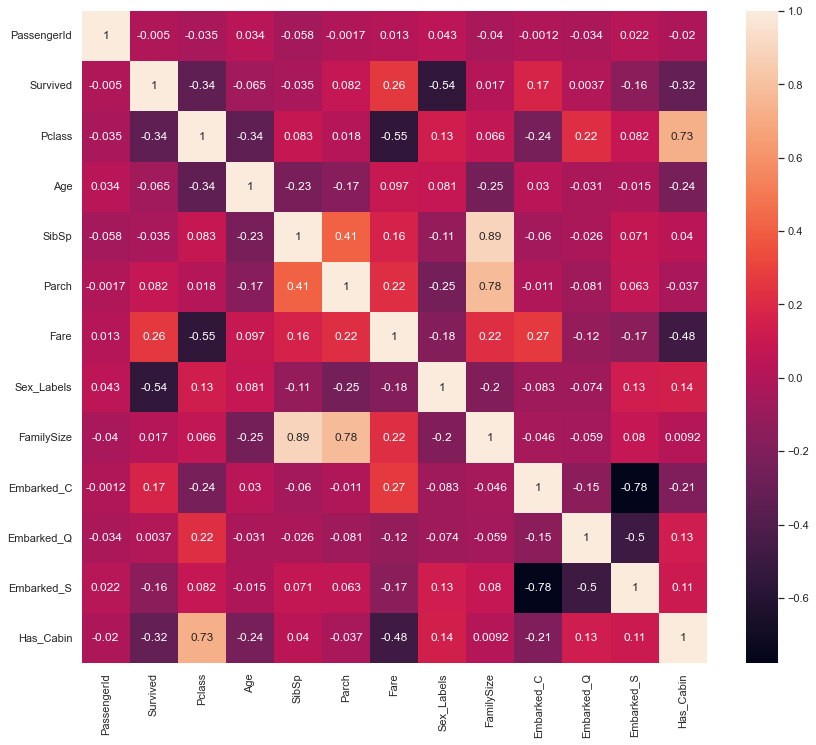

In [41]:
plt.figure(figsize=(14,12))
sns.heatmap(train_df.corr(), annot=True)

## drop unnecessary columns

In [42]:
train_df.drop(['Name','Ticket','Sex','Cabin'], axis=1, inplace=True)

In [43]:
train_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_Labels,FamilySize,Embarked_C,Embarked_Q,Embarked_S,Has_Cabin
0,1,0,3,22.0,1,0,7.2500,1,1,0,0,1,1
1,2,1,1,38.0,1,0,71.2833,0,1,1,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,0,1,1
3,4,1,1,35.0,1,0,53.1000,0,1,0,0,1,0
4,5,0,3,35.0,0,0,8.0500,1,0,0,0,1,1


In [44]:
model_feed_df = train_df.drop(['PassengerId'], axis=1)
passenger_id = train_df['PassengerId']

In [45]:
model_feed_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_Labels,FamilySize,Embarked_C,Embarked_Q,Embarked_S,Has_Cabin
0,0,3,22.0,1,0,7.2500,1,1,0,0,1,1
1,1,1,38.0,1,0,71.2833,0,1,1,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,0,1,1
3,1,1,35.0,1,0,53.1000,0,1,0,0,1,0
4,0,3,35.0,0,0,8.0500,1,0,0,0,1,1


In [46]:
model_feed_df.shape

(891, 12)

In [47]:
passenger_id.shape

(891,)

# Data wrangling function generation

In [48]:
def wrangle_data(df):
    df['Sex'] = df['Sex'].apply(lambda x: x.lower())
    df['Sex_Labels'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Fare'].fillna(df['Fare'].median(), inplace=True)
    df['FamilySize'] = df['SibSp'] + df['Parch']
    df['Embarked'].fillna('S')
    df = pd.get_dummies(df, columns=['Embarked'])
    df['Has_Cabin'] = df["Cabin"].apply(lambda x: 1 if type(x) == float else 0)
    df.drop(['Name','Ticket','Sex','Cabin'], axis=1, inplace=True)
    model_feed_df = df.drop(['PassengerId'], axis=1)
    passenger_id = df['PassengerId']
    return model_feed_df, passenger_id

# Model Training

### Random Forest Training

In [49]:
train_features = model_feed_df.drop(['Survived'], axis=1)
train_targets = model_feed_df['Survived']

In [70]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=80)

In [71]:
rf = rf.fit(train_features, train_targets)
score = rf.score(train_features, train_targets)
"Mean accuracy of Random Forest: {0}".format(score)

'Mean accuracy of Random Forest: 0.9831649831649831'

### Logistic Regression Testing

In [72]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [73]:
#Execute data wrangler
model_feed_df, passenger_id = wrangle_data(test_df)

In [74]:
model_feed_df.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_Labels,FamilySize,Embarked_C,Embarked_Q,Embarked_S,Has_Cabin
0,3,34.5,0,0,7.8292,1,0,0,1,0,1
1,3,47.0,1,0,7.0000,0,1,0,0,1,1
2,2,62.0,0,0,9.6875,1,0,0,1,0,1
3,3,27.0,0,0,8.6625,1,0,0,0,1,1
4,3,22.0,1,1,12.2875,0,2,0,0,1,1


In [75]:
model_feed_df.isna().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_Labels    0
FamilySize    0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Has_Cabin     0
dtype: int64

In [76]:
model_feed_df.shape

(418, 11)

In [78]:
rf_pred=rf.predict(model_feed_df)
print(rf_pred)

[0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1
 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0
 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0
 1 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0
 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 1 1 1 1 0 0 1 0 0 1]


In [79]:
passenger_id.head()

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

In [80]:
type(rf_pred)

numpy.ndarray

In [82]:
prediction_df = pd.DataFrame()
prediction_df['PassengerId'] = passenger_id.tolist()
prediction_df['Survived'] = rf_pred.tolist()

In [83]:
type(passenger_id)

pandas.core.series.Series

In [84]:
prediction_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [85]:
prediction_df.to_csv('titanic_rf_submission.csv', index=False)